# Tutorial/Assignment 3

## Load the matplotlib package

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Simple plot 

Reproduce the following plot of `sin(x)`.

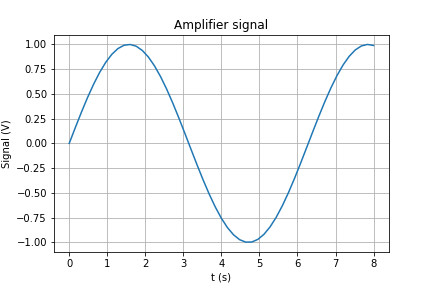

Text(0.5,1,'Amplifier signal')

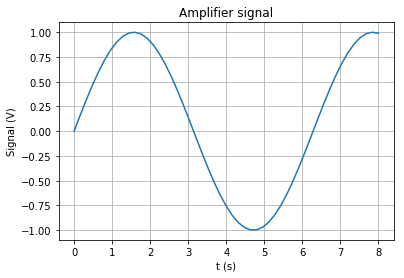

In [2]:
x = np.linspace(0, 8, 51)
plt.plot(x, np.sin(x))
plt.grid()
plt.xlabel('t (s)')
plt.ylabel('Signal (V)')
plt.title('Amplifier signal')

## Anscombe's quartet

Reproduce the figure found at https://en.wikipedia.org/wiki/Anscombe's_quartet using the data found on that page and the linear regression equation that is found in the table.

In [38]:
# Data copied from the wikipedia link
data_string = """10.0	8.04	10.0	9.14	10.0	7.46	8.0	6.58
8.0	6.95	8.0	8.14	8.0	6.77	8.0	5.76
13.0	7.58	13.0	8.74	13.0	12.74	8.0	7.71
9.0	8.81	9.0	8.77	9.0	7.11	8.0	8.84
11.0	8.33	11.0	9.26	11.0	7.81	8.0	8.47
14.0	9.96	14.0	8.10	14.0	8.84	8.0	7.04
6.0	7.24	6.0	6.13	6.0	6.08	8.0	5.25
4.0	4.26	4.0	3.10	4.0	5.39	19.0	12.50
12.0	10.84	12.0	9.13	12.0	8.15	8.0	5.56
7.0	4.82	7.0	7.26	7.0	6.42	8.0	7.91
5.0	5.68	5.0	4.74	5.0	5.73	8.0	6.89"""
data = []
for line in data_string.split('\n'):
    data_line = []
    for el in line.split('\t'):
        data_line.append(float(el))
    data.append(data_line)
data = np.array(data)
data

array([[10.  ,  8.04, 10.  ,  9.14, 10.  ,  7.46,  8.  ,  6.58],
       [ 8.  ,  6.95,  8.  ,  8.14,  8.  ,  6.77,  8.  ,  5.76],
       [13.  ,  7.58, 13.  ,  8.74, 13.  , 12.74,  8.  ,  7.71],
       [ 9.  ,  8.81,  9.  ,  8.77,  9.  ,  7.11,  8.  ,  8.84],
       [11.  ,  8.33, 11.  ,  9.26, 11.  ,  7.81,  8.  ,  8.47],
       [14.  ,  9.96, 14.  ,  8.1 , 14.  ,  8.84,  8.  ,  7.04],
       [ 6.  ,  7.24,  6.  ,  6.13,  6.  ,  6.08,  8.  ,  5.25],
       [ 4.  ,  4.26,  4.  ,  3.1 ,  4.  ,  5.39, 19.  , 12.5 ],
       [12.  , 10.84, 12.  ,  9.13, 12.  ,  8.15,  8.  ,  5.56],
       [ 7.  ,  4.82,  7.  ,  7.26,  7.  ,  6.42,  8.  ,  7.91],
       [ 5.  ,  5.68,  5.  ,  4.74,  5.  ,  5.73,  8.  ,  6.89]])

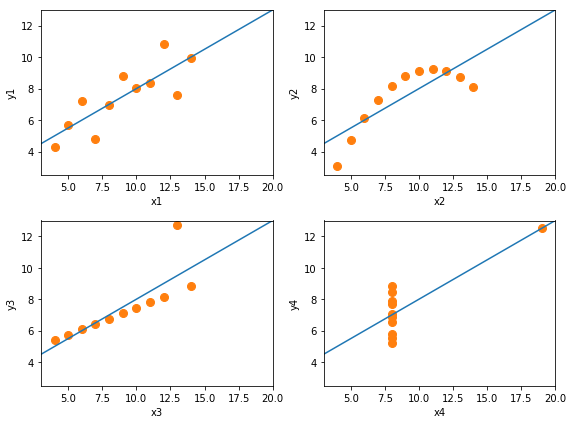

In [50]:
plt.figure(figsize=(8, 6))
for i in range(4):
    plt.subplot(2, 2, i+1)
    points = plt.plot(data[:, 2*i], data[:, 2*i+1], 'oC1', ms=8)
    x_line = np.array([3, 20])
    y_line = 3 + 0.5*x_line
    plt.plot(x_line, y_line, 'C0')
    plt.xlim(3, 20)
    plt.ylim(2.5, 13)
    plt.xlabel('x' + str(i + 1))
    plt.ylabel('y{}'.format(i + 1))
    # plt.ylabel(f'y{i+1}')  # The modern way of doing it with f-strings
plt.tight_layout()

## Colors, line styles, and marker styles

Reproduce this figure:
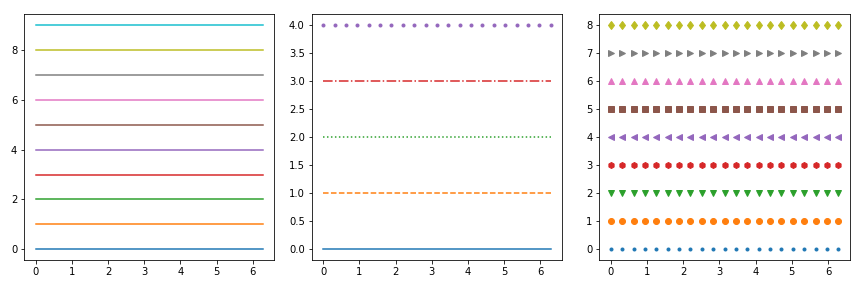

Documentation:
- https://matplotlib.org/3.1.0/api/markers_api.html
- https://matplotlib.org/3.1.0/gallery/lines_bars_and_markers/linestyles.html
- https://matplotlib.org/3.1.0/api/colors_api.html#module-matplotlib.colors

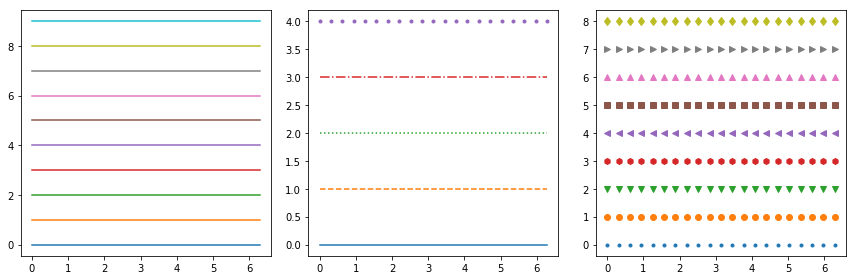

In [3]:
plt.figure(figsize=(12, 4))
plt.subplot(131)

x = np.linspace(0, 2*np.pi, 21)
for i in range(10):
    plt.plot(x, 0*x + i)
    
plt.subplot(132)

for i, ls in enumerate(['-', '--', ':', '-.', '.']):
    plt.plot(x, 0*x + i, ls)
    
plt.subplot(133)

for i, ms in enumerate(['.', 'o', 'v', 'h', '<', 's', '^', '>', 'd']):
    plt.plot(x, 0*x + i, ms)
    
plt.tight_layout()

## Histograms

Reproduce the following histogram: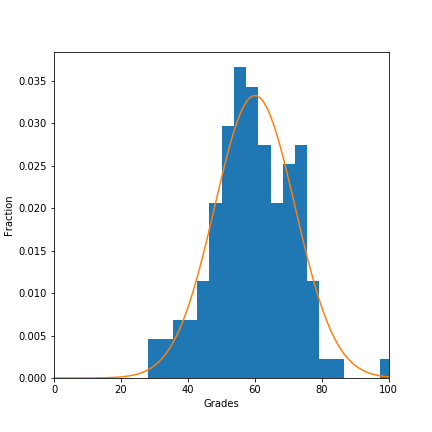

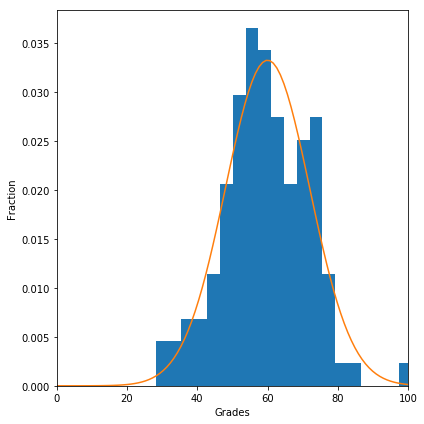

In [5]:
np.random.seed(102)
mu = 60
sigma = 12
x = mu + sigma * np.random.randn(120)

plt.figure(figsize=(6, 6))
plt.hist(x, 20, density=True)
xs = np.linspace(0, 100, 100)
plt.plot(xs, 1/((2*np.pi)**0.5*sigma)*np.exp(-(xs - mu)**2/(2*sigma**2)))
plt.xlim(0, 100)
plt.xlabel('Grades')
plt.ylabel('Fraction')
plt.tight_layout()

## Vector plots

Use the `quiver` plot type to reproduce this image
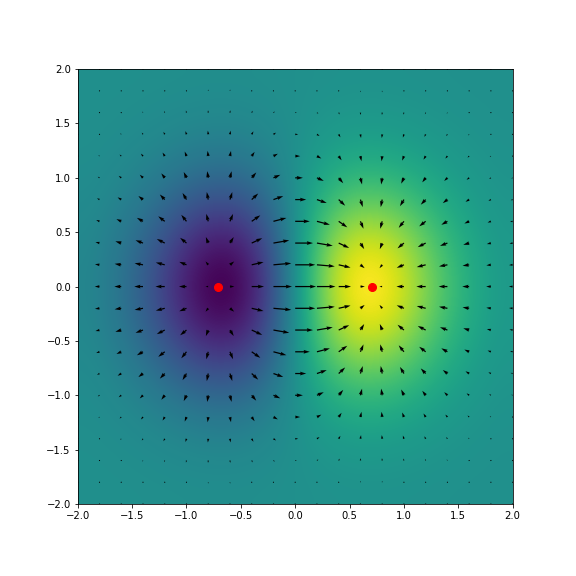

The function to plot is $z=x\exp(-x^2-y^2)$.

In order to create the vector field you will need to use the `np.gradient` function.
https://docs.scipy.org/doc/numpy/reference/generated/numpy.gradient.html

When using the gradient function, you need to be aware of the order in which the x and y gradients are returned. The gradient array is returned in axis order, i.e. `axis=0` first and `axis=1` second. If you have passed a 2d array with x increasing along `axis=1`, then the x gradient is the second array returned by the gradient function.

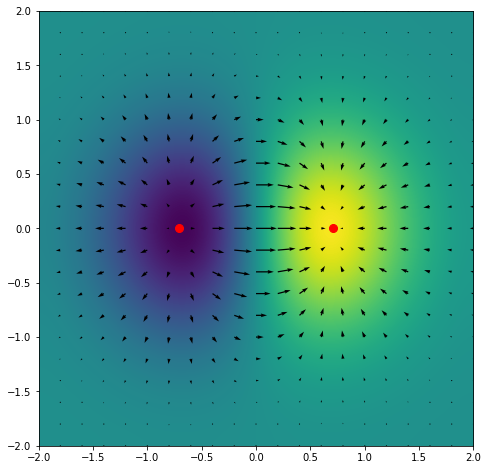

In [19]:
x = np.linspace(-2, 2, 21)
y = np.linspace(-2, 2, 21)
X, Y = np.meshgrid(x, y)

Z = X*np.exp(-X**2 - Y**2)
V, U = np.gradient(Z, .2, .2)  # Note the order of V, U. The x-gradient (U) is the second array

plt.figure(figsize=(8, 8))
plt.imshow(Z, interpolation='bicubic',
               origin='lower', extent=[min(x), max(x), min(y), max(y)],
               vmax=abs(Z).max(), vmin=-abs(Z).max())

plt.quiver(X, Y, U, V, scale=20)
plt.plot([-1/2**0.5, 1/2**0.5], [0, 0], 'ro', ms=8)
plt.savefig('test.png')